In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
# Requires paramnb package to be installed
import param,paramnb

# Contents
### Data Frame
<div style="margin-left:50px">
<a href="#filesel">File selector</a><br>
<a href="#shape">Shape</a><br>
<a href="#cols">Column names and data types</a><br>
<a href="#preview">Preview</a><br>
</div>

### Column
<div style="margin-left:50px">
<a href="#colsel">Column selector</a><br>
<a href="#coldescription">Description</a><br>
<a href="#colvalues">Values count</a><br>
</div>

### Filter
<div style="margin-left:50px">
<a href="#filtersel">Filter selector</a><br>
<a href="#filteredprev">Filtered preview</a><br>
<a href="#filteredcolsel">Filtered column selector</a><br>
<a href="#filtereddesc">Filtered description</a><br>
<a href="#filteredvalues">Filtered values count</a><br>
</div>


### Plots
<div style="margin-left:50px">
<a href="#intersel">Interaction selector</a><br>
<a href="#scatter">Scatter plot</a><br>
</div>

In [3]:
# Define global variables

available_encodings=[
"utf-8",
"latin1"
]

available_dtypes=[
    "Do not convert",
    "Numeric (remove commas)"
]

class DataConverters():
    def remove_commas(series):
        for i,val in enumerate(series):
            if type(val)=="str":
                series[i]=str(series[i]).replace(",","")
        return series

# <font color="goldenrod">Enter a list of input files here to get started </font>

<a name="filesel"></a>

In [ ]:
# A list of input files

# obtained by wildcard
#path2files=glob.glob("")

# OR from a list
path2files=[
    "train.csv"
]

class FileSelector(param.Parameterized):
    selected_file=param.ObjectSelector(objects=path2files)
    file_encoding=param.ObjectSelector(default="utf-8",objects=available_encodings)

paramnb.Widgets(FileSelector,next_n=4)

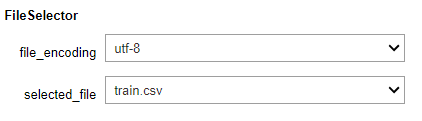

<a name="shape"></a>

In [5]:
# Read file into a data frame
if FileSelector.selected_file.endswith("csv"):
    df=pd.read_csv(FileSelector.selected_file,encoding=FileSelector.file_encoding)
elif FileSelector.selected_file.endswith("xlsx") or FileSelector.selected_file.endswith("xls"):
    df=pd.read_excel(FileSelector.selected_file,encoding=FileSelector.file_encoding)

print("Rows: {}\tCols: {}".format(df.shape[0],df.shape[1]))

Rows: 891	Cols: 12


<a name="cols"></a>

In [6]:
pd.DataFrame({"Column Names":df.columns.values,"Data Types":df.dtypes.values})

,Column Names,Data Types
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


<a name="preview"></a>

In [7]:
df.sample(10).transpose()

,109,741,254,606,759,333,401,58,581,636
PassengerId,110,742,255,607,760,334,402,59,582,637
Survived,1,0,0,0,1,0,0,1,1,0
Pclass,3,1,3,3,1,3,3,2,1,3
Name,"Moran, Miss. Bertha","Cavendish, Mr. Tyrell William","Rosblom, Mrs. Viktor (Helena Wilhelmina)","Karaic, Mr. Milan","Rothes, the Countess. of (Lucy Noel Martha Dye...","Vander Planke, Mr. Leo Edmondus","Adams, Mr. John","West, Miss. Constance Mirium","Thayer, Mrs. John Borland (Marian Longstreth M...","Leinonen, Mr. Antti Gustaf"
Sex,female,male,female,male,female,male,male,female,female,male
Age,NaN,36,41,30,33,16,26,5,39,32
SibSp,1,1,0,0,0,2,0,1,1,0
Parch,0,0,2,0,0,0,0,2,1,0
Ticket,371110,19877,370129,349246,110152,345764,341826,C.A. 34651,17421,STON/O 2. 3101292
Fare,24.15,78.85,20.2125,7.8958,86.5,18,8.05,27.75,110.883,7.925


# <font color="goldenrod">Select a column to take a closer look</font>

<a name="colsel"></a>

In [ ]:
class ColumnSelector(param.Parameterized):
    selected_col=param.ObjectSelector(objects=df.columns.values)
    convert_dtype=param.ObjectSelector(default="Do not convert",objects=available_dtypes)
    
paramnb.Widgets(ColumnSelector,next_n=3)

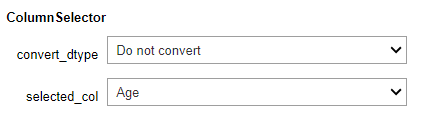

<a name="coldescription"></a>

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


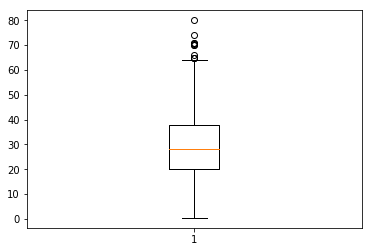

In [9]:
if not ColumnSelector.convert_dtype=="Do not convert":
    if ColumnSelector.convert_dtype=="Numeric (remove commas)":
        column_series=DataConverters.remove_commas(df[ColumnSelector.selected_col])
        column_series=pd.to_numeric(column_series,errors="coerce")
else:
    column_series=df[ColumnSelector.selected_col]

print(column_series.describe())

if np.issubdtype(column_series.dtype,np.number):
    plt.boxplot(column_series.dropna())

<a name="colvalues"></a>

NA count: 177


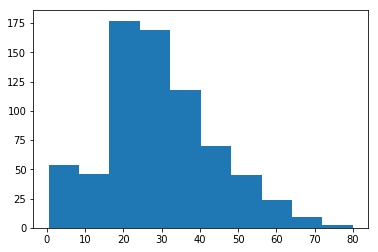

In [10]:
if np.issubdtype(column_series.dtype,np.number):
    print("NA count: {}".format(np.sum(pd.isnull(column_series))))
    plt.hist(column_series.dropna())
else:
    print("NA count: {}".format(np.sum(pd.isnull(column_series))))
    print(pd.DataFrame(column_series.value_counts(dropna=False)))

# <font color="goldenrod">Look at data filtered by the selected column</font>

<a name="filtersel"></a>

In [ ]:
if np.issubdtype(column_series.dtype,np.number):
    class FilterSelector(param.Parameterized):
        filter_by_value=param.Range(bounds=(column_series.min(), column_series.max()))
        filter_by_na=param.Boolean()
else:    
    class FilterSelector(param.Parameterized):
        filter_by_value=param.ObjectSelector(objects=column_series.values)
        filter_by_na=param.Boolean()

if not np.issubdtype(column_series.dtype,np.number):
# May take too long to load
    if len(column_series.unique())<2000:
        paramnb.Widgets(FilterSelector,next_n=2)
else:
    paramnb.Widgets(FilterSelector,next_n=2)

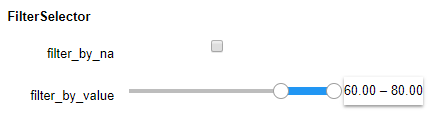

<a name="filteredprev"></a>

In [18]:
if FilterSelector.filter_by_na==True:
    subdf=df[df[ColumnSelector.selected_col].isnull()]
    display(subdf.sample(10).transpose())
else:
    if np.issubdtype(column_series.dtype,np.number):
        subdf=df[np.array(df[ColumnSelector.selected_col]>=FilterSelector.filter_by_value[0]) & np.array(df[ColumnSelector.selected_col]<=FilterSelector.filter_by_value[1])]
        display(subdf.sample(10).transpose())
    else:
        subdf=df[df[ColumnSelector.selected_col]==FilterSelector.filter_by_value]
        display(subdf.sample(10).transpose())

,252,54,96,851,366,570,326,829,493,672
PassengerId,253,55,97,852,367,571,327,830,494,673
Survived,0,0,0,0,1,1,0,1,0,0
Pclass,1,1,1,3,1,2,3,1,1,2
Name,"Stead, Mr. William Thomas","Ostby, Mr. Engelhart Cornelius","Goldschmidt, Mr. George B","Svensson, Mr. Johan","Warren, Mrs. Frank Manley (Anna Sophia Atkinson)","Harris, Mr. George","Nysveen, Mr. Johan Hansen","Stone, Mrs. George Nelson (Martha Evelyn)","Artagaveytia, Mr. Ramon","Mitchell, Mr. Henry Michael"
Sex,male,male,male,male,female,male,male,female,male,male
Age,62,65,71,74,60,62,61,62,71,70
SibSp,0,0,0,0,1,0,0,0,0,0
Parch,0,1,0,0,0,0,0,0,0,0
Ticket,113514,113509,PC 17754,347060,110813,S.W./PP 752,345364,113572,PC 17609,C.A. 24580
Fare,26.55,61.9792,34.6542,7.775,75.25,10.5,6.2375,80,49.5042,10.5


# <font color="goldenrod">Distribution of a column after filtering</font>

<a name="filteredcolsel"></a>

In [ ]:
class FilteredColumnSelector(param.Parameterized):
    selected_col=param.ObjectSelector(objects=df.columns.values)
    convert_dtype=param.ObjectSelector(default="Do not convert",objects=available_dtypes)
    
paramnb.Widgets(FilteredColumnSelector,next_n=2)

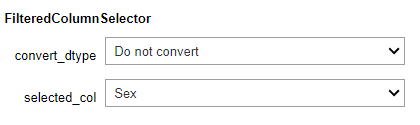

<a name="filtereddesc"></a>

In [20]:
if not FilteredColumnSelector.convert_dtype=="Do not convert":
    if FilteredColumnSelector.convert_dtype=="Numeric (remove commas)":
        filtered_column_series=DataConverters.remove_commas(subdf[FilteredColumnSelector.selected_col])
        filtered_column_series=pd.to_numeric(filtered_column_series,errors="coerce")
else:
    filtered_column_series=subdf[FilteredColumnSelector.selected_col]

print(filtered_column_series.describe())

if np.issubdtype(filtered_column_series.dtype,np.number):
    plt.boxplot(filtered_column_series.dropna())

count       26
unique       2
top       male
freq        22
Name: Sex, dtype: object


<a name="filteredvalues"></a>

In [21]:
if np.issubdtype(filtered_column_series.dtype,np.number):
    print("NA count: {}".format(np.sum(pd.isnull(filtered_column_series))))
    plt.hist(filtered_column_series.dropna())
else:
    print("NA count: {}".format(np.sum(pd.isnull(filtered_column_series))))
    print(pd.DataFrame(filtered_column_series.value_counts(dropna=False)))

NA count: 0
        Sex
male     22
female    4


# <font color="goldenrod">Interaction between two variables</font>

<a name="intersel"></a>

In [ ]:
class InteractionSelector(param.Parameterized):
    first_variable=param.ObjectSelector(objects=df.columns.values)
    second_variable=param.ObjectSelector(objects=df.columns.values)
    invert_axis=param.Boolean()
    
paramnb.Widgets(InteractionSelector,next_n=1)

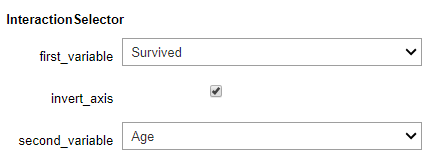

<a name="scatter"></a>

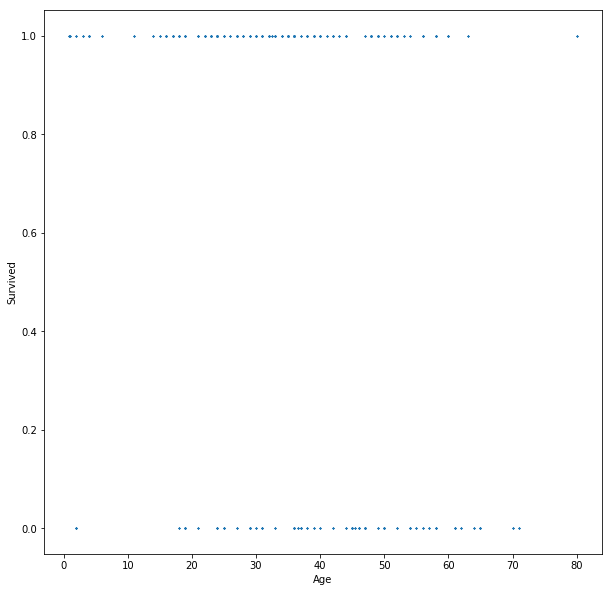

In [33]:
# Scatter plot
plt.figure(figsize=(10,10))
if not InteractionSelector.invert_axis==True:
    plt.scatter(df.dropna()[InteractionSelector.first_variable],df.dropna()[InteractionSelector.second_variable],marker='x',s=2)
    plt.xlabel(InteractionSelector.first_variable)
    plt.ylabel(InteractionSelector.second_variable)
else:
    plt.scatter(df.dropna()[InteractionSelector.second_variable],df.dropna()[InteractionSelector.first_variable],marker="x",s=2)
    plt.ylabel(InteractionSelector.first_variable)
    plt.xlabel(InteractionSelector.second_variable)

# Do not change codes above, insert your custom codes below